# Wine Quality Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

In [4]:
dataset= pd.read_csv('Final Project 1.csv')

In [5]:
dataset.head()

,Fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN


In [6]:
dataset.describe()

,Fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,0.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,NaN
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,NaN


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Unnamed: 12           0 non-null      float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB


In [8]:
dataset.isnull().sum()

Fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
Unnamed: 12             1599
dtype: int64

<AxesSubplot:xlabel='pH', ylabel='Count'>

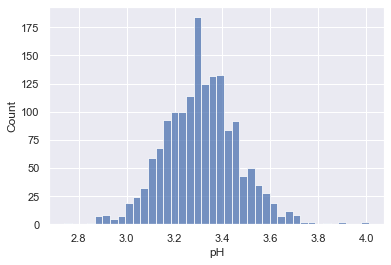

In [9]:
sns.set()
sns.histplot(dataset['pH'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

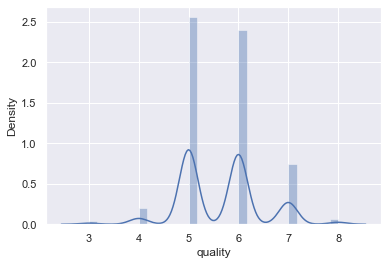

In [10]:
sns.set()
sns.distplot(dataset['quality'])

array([[<AxesSubplot:title={'center':'Fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'Unnamed: 12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

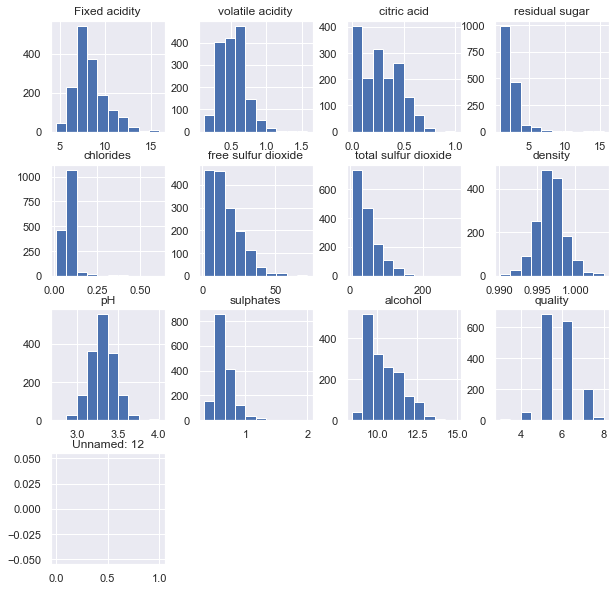

In [11]:
dataset.hist(figsize=(10,10))

<AxesSubplot:>

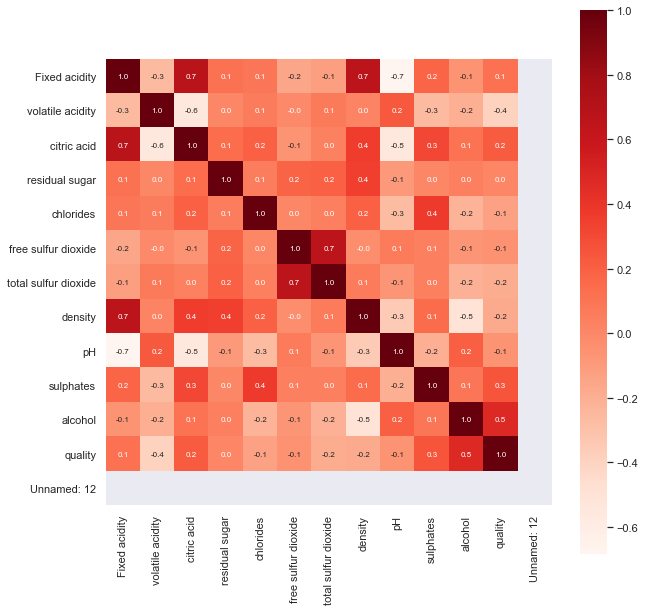

In [12]:
corrltn = dataset.corr()
plt.pyplot.subplots(figsize=(10,10))
sns.heatmap(corrltn, cbar=True, square = True, fmt='.1f', annot = True, annot_kws = {'size':8}, cmap='Reds')

In [13]:
dataset['goodquality'] = [1 if x >= 7 else 0 for x in dataset['quality']]
# Separate feature variables and target variable
X = dataset.drop(['quality','goodquality'], axis = 1)
y = dataset['goodquality']

In [14]:
X.head()

,Fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Unnamed: 12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN


In [15]:
X.describe()

,Fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Unnamed: 12
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,0.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,NaN
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,NaN


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: goodquality, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
x_features = X
x = StandardScaler().fit_trasform(X)

In [10]:
from sklearn.preprocessing import scale
X_scale = scale(x)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)

NameError: name 'x' is not defined

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [ ]:
Y_pred=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_pred,Y_train)
training_data_accuracy

In [ ]:
model_linear_svm  = SVC(kernel='linear')
model_linear_svm.fit(X_train, Y_train)
y_pred = model_linear_svm.predict(X_test)

In [11]:
print("Accuracy : ", accuracy_score(Y_test, y_pred))

NameError: name 'accuracy_score' is not defined

In [12]:
print("Confusion Matrix : ", confusion_matrix(Y_test, y_pred))

NameError: name 'confusion_matrix' is not defined

In [13]:
non_linear_SVM = SVC(kernel='rbf')
non_linear_SVM.fit(X_train, Y_train)
y_pred = non_linear_SVM.predict(X_test)
print("Accuracy of Non Linear Model: ", accuracy_score(Y_test, y_pred))

NameError: name 'SVC' is not defined

In [14]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=2)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(Y_test, y_pred5))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(Y_test, y_pred2))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski') 
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_Y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(Y_test, knn_Y_pred)
sns.heatmap(knn_cm, annot=True)

In [ ]:
print(classification_report(Y_test, knn_Y_pred))